<a href="https://colab.research.google.com/github/Njaramba-Riri/Tensorflow/blob/main/Pre_Trained.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [7]:
import os
from zipfile import ZipFile
from urllib.request import urlretrieve
import glob

import matplotlib.pyplot as plt
import tensorflow as tf

In [8]:
def download_zip(url, save_path):
  print(f"Donwloading and extracting files...", end="")

  urlretrieve(url, save_path)

  try:
    with ZipFile(save_path) as z:
      z.extractall(os.path.split(save_path)[0])

      print("Done!")
  except Exception as e:
    print("\nInvalid file", e)



URL = r"https://www.dropbox.com/s/8srx6xdjt9me3do/TF-Keras-Bootcamp-NB07-assets.zip?dl=1"
asset_zip_path = os.path.join(os.getcwd(), 'colab-assets')

if not os.path.exists(asset_zip_path):
  download_zip(URL, asset_zip_path)

Donwloading and extracting files...Done!


In [10]:
image_paths = sorted(glob.glob("images/*.png"))
print(image_paths)

['images/baseball-player.png', 'images/clown-fish.png', 'images/elephant.png', 'images/forklift.png', 'images/ice-cream.png', 'images/lemons.png', 'images/magnetic-compass.png', 'images/polar-bear.png']


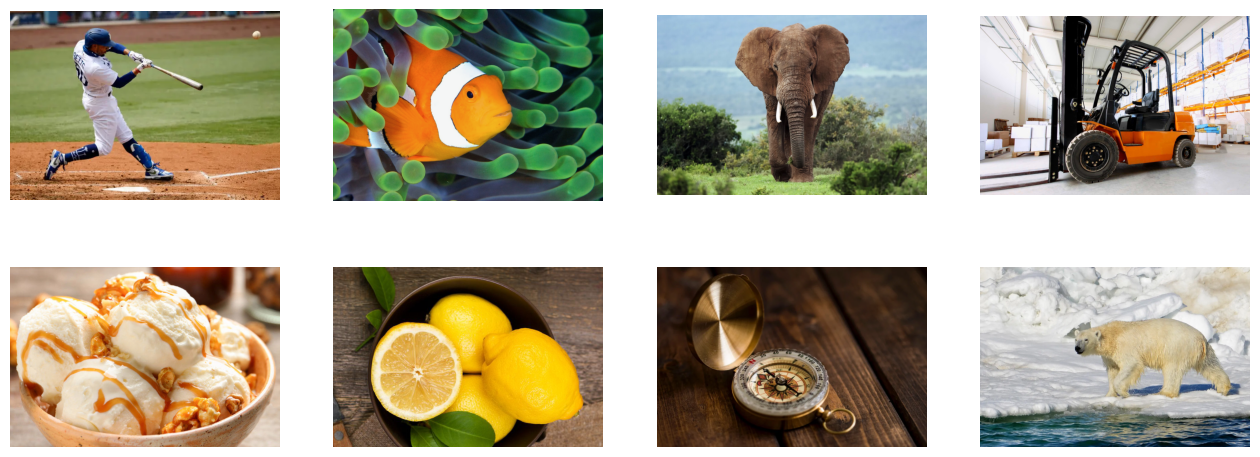

In [11]:
plt.figure(figsize=(16, 6))
for idx, img_path in enumerate(image_paths):
  image = plt.imread(img_path)
  plt.subplot(2, 4, idx + 1)
  plt.imshow(image)
  plt.axis('off')

## Load pre-trained models.


In [12]:
model_vgg       = tf.keras.applications.vgg16.VGG16()
model_resnet    = tf.keras.applications.resnet50.ResNet50()
model_inception = tf.keras.applications.inception_v3.InceptionV3()

96112376/96112376 [==============================] - 1s 0us/step


In [14]:
print("VGG16 shape: ", model_vgg.input_shape)
print("ResNet shape: ", model_resnet.input_shape)
print("Inception shape: ", model_inception.input_shape)

VGG16 shape:  (None, 224, 224, 3)
ResNet shape:  (None, 224, 224, 3)
Inception shape:  (None, 299, 299, 3)


- Convenience function for batch processing.

In [26]:
def batch_processing(model, image_paths, size, preprocess_input, display_top_k=False, top_k=2):
  plt.figure(figsize=(20, 7))
  for idx, image_path in enumerate(image_paths):
    #Read the image using tensorflow
    tensor_image = tf.io.read_file(image_path)

    #Decode the tesor image from bytes string to numeric tensor.
    decoded_image = tf.image.decode_image(tensor_image)

    #Resize the image to the sppatial size required by the model.
    resized_image = tf.image.resize(decoded_image, size)

    #Add a batch dimension to the first axis(required).
    image_batch = tf.expand_dims(resized_image, axis=0)

    #Preprocess the input image
    image_batch = preprocess_input(image_batch)

    #Forward pass through the model to make predictions.
    preds = model.predict(image_batch)

    #Decode and rank the top-k predictions.
    #Returns a list of tuples --> Class ID, Class description, probability.
    decoded_preds = tf.keras.applications.imagenet_utils.decode_predictions(
        preds=preds,
        top=5
    )

    if display_top_k == True:
      for i in range(top_k):
        print("Top {} Predicted class: Pr(class={:20} [index={:4}] = {:5.2f})".format(
            i+1, decoded_preds[0][i][1], i, decoded_preds[0][i][2] * 100
        ))

    plt.subplot(2, 4, idx+1)
    plt.imshow(decoded_image)
    label = decoded_preds[0][0][1]
    score = decoded_preds[0][0][2] * 100
    title = label + ' ' + str('{:.2f}%'.format(score))
    plt.title(title, fontsize=14, color='g')
    plt.axis('off')

### Making predictions with the pretrained models.
- VGG16.

1/1 [==============================] - 1s 580ms/step


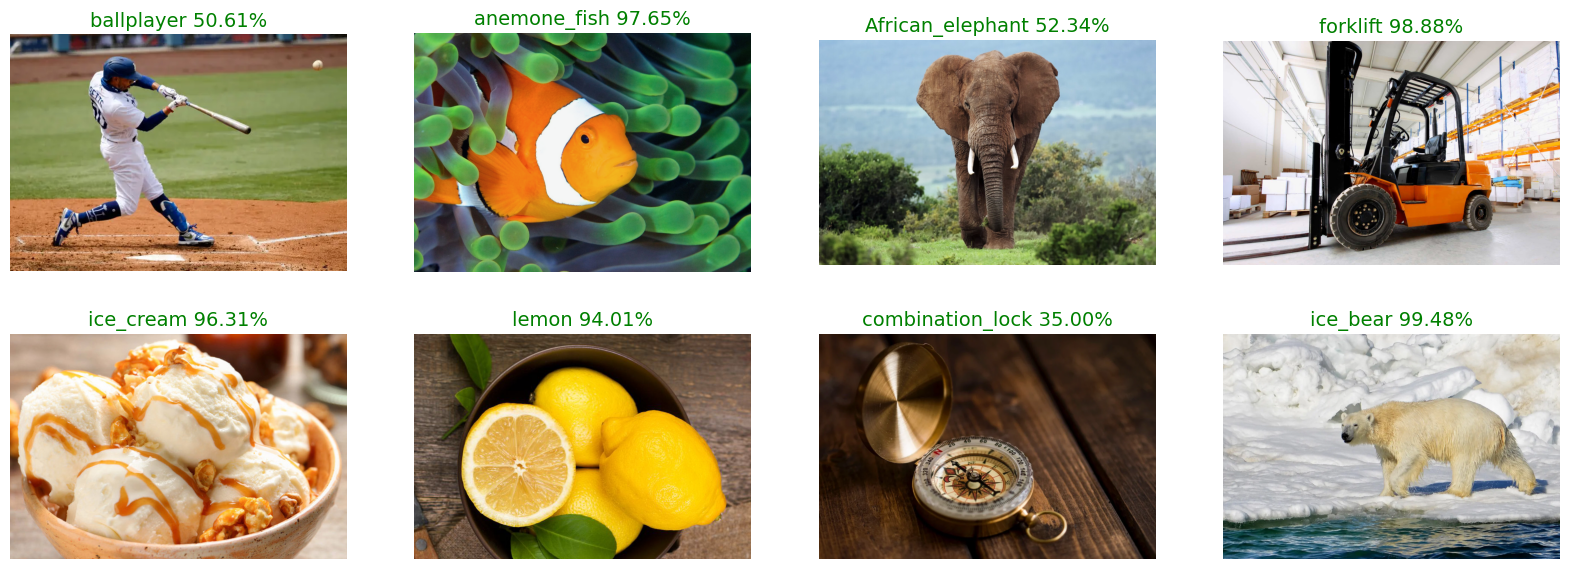

In [27]:
model = model_vgg
size = (224, 224)

preprocess_input = tf.keras.applications.vgg16.preprocess_input

batch_processing(model, image_paths, size, preprocess_input)

- ResNet50

1/1 [==============================] - 0s 209ms/step


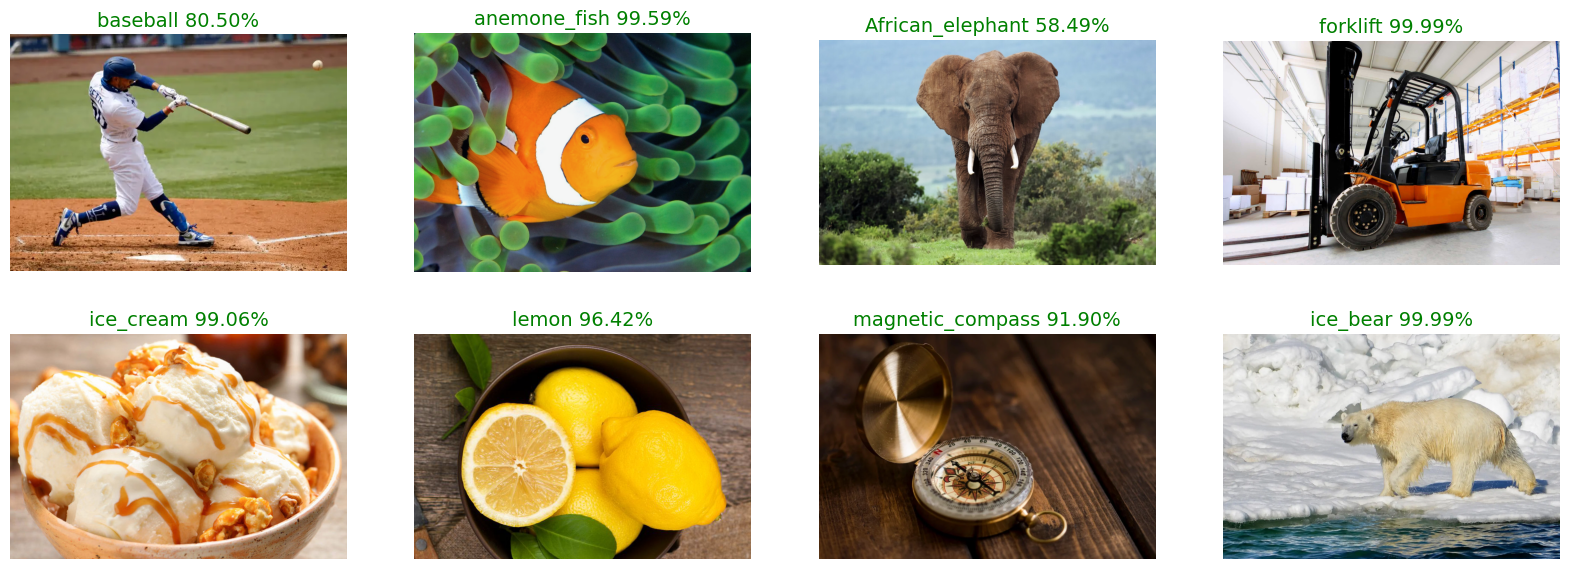

In [28]:
model = model_resnet
size = (224, 224)

preprocess_input = tf.keras.applications.resnet50.preprocess_input

batch_processing(model, image_paths, size, preprocess_input)

- Inception-V3

1/1 [==============================] - 0s 252ms/step
Top 1 Predicted class: Pr(class=ballplayer           [index=   0] = 69.22)
Top 2 Predicted class: Pr(class=baseball             [index=   1] = 30.62)
1/1 [==============================] - 0s 237ms/step
Top 1 Predicted class: Pr(class=anemone_fish         [index=   0] = 92.48)
Top 2 Predicted class: Pr(class=sea_anemone          [index=   1] =  2.61)
1/1 [==============================] - 0s 262ms/step
Top 1 Predicted class: Pr(class=African_elephant     [index=   0] = 89.94)
Top 2 Predicted class: Pr(class=tusker               [index=   1] =  7.94)
1/1 [==============================] - 0s 245ms/step
Top 1 Predicted class: Pr(class=forklift             [index=   0] = 98.95)
Top 2 Predicted class: Pr(class=golfcart             [index=   1] =  0.07)
1/1 [==============================] - 0s 251ms/step
Top 1 Predicted class: Pr(class=ice_cream            [index=   0] = 99.60)
Top 2 Predicted class: Pr(class=cradle               [index=

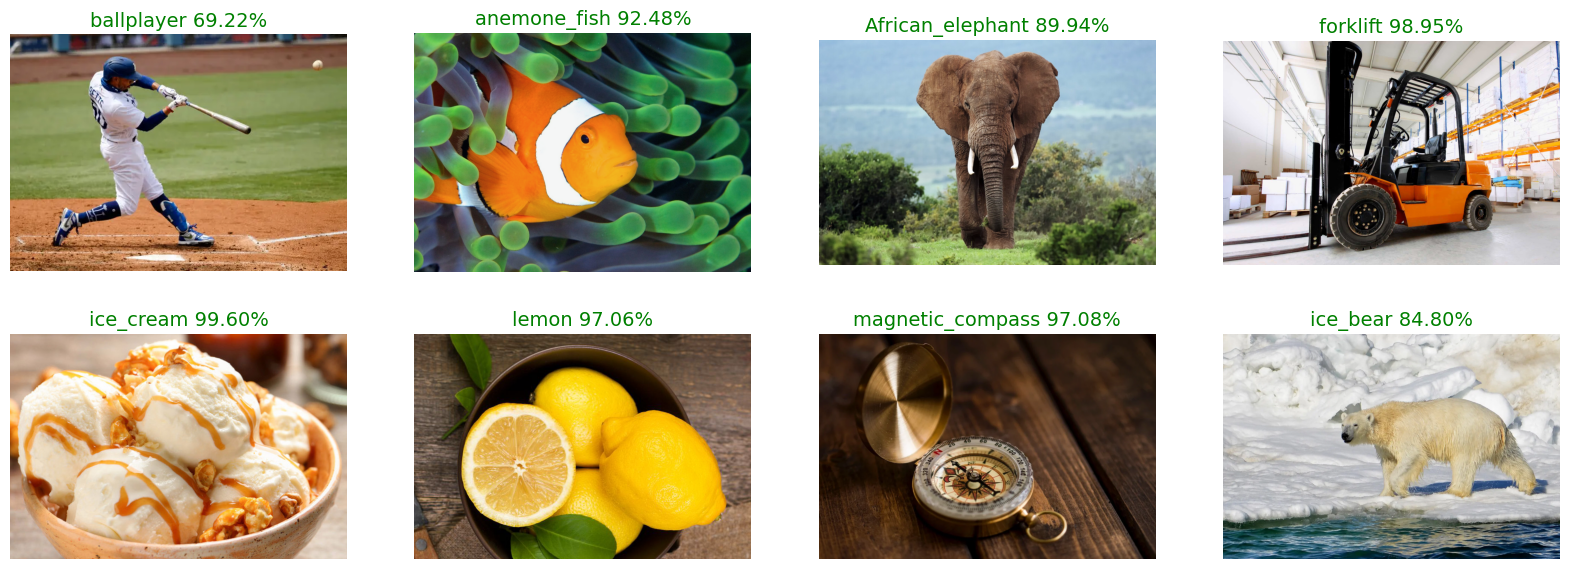

In [30]:
model = model_inception
size = (299, 299)

preprocess_input = tf.keras.applications.inception_v3.preprocess_input

batch_processing(model, image_paths, size, preprocess_input, display_top_k=True)